In [1]:
# EX 13-10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
df = sns.load_dataset('titanic')      # 타이나틱 데이터셋 가져오기
pd.set_option('display.max_columns', 6)

print('>> 타이타닉에 탑승한 클래스별 인원 정보 출력')
df.groupby('class').count()   # 클래스 별로 묶어서(행 지정) 인원 수 출력

>> 타이타닉에 탑승한 클래스별 인원 정보 출력


,survived,pclass,sex,...,embark_town,alive,alone
class,,,,,,,
First,216,216,216,...,214,216,216
Second,184,184,184,...,184,184,184
Third,491,491,491,...,491,491,491


In [2]:
# EX 13-11
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')

print('>> 타이타닉 탑승 인원 중 클래스별 생존율 분석\n')
df.pivot_table('survived', index='class', columns='who')     # 피봇테이블 만들기: survived 데이터 사용, class  를 행, who를 열로 

>> 타이타닉 탑승 인원 중 클래스별 생존율 분석



who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


# catplot

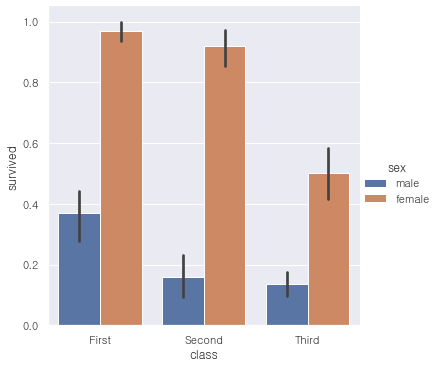

In [3]:
#EX) 13-12
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'darkgrid')    # 그래프 스타일: seaborn의 기본 값

# 주피터 노트북을 실행한 브라우저에 그래프가 나타나도록 설정
%matplotlib inline 

# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = 'c:/Windows/Fonts/NGULIM.ttf'  # 폰트가 설치되어 있는 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = sns.load_dataset('titanic')  # 타이타닉 데이터셋 가져오기
sns.catplot(data = df, x='class', y='survived', hue='sex', kind='bar')  # df데이터사용, 클래스를 생존률별로, 성별을 매개변수, 바 플롯

plt.show()

## distplot() : '러그'와 '커널 밀도' 표시 기능이 있어서 막대그래프를 그릴 때 hist보다 많이 사용!
## 수치형데이터에서만 distplot() 적용 가능!

C:\Users\create\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\create\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


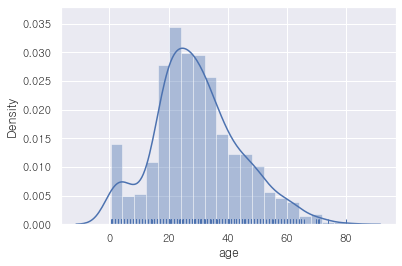

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'darkgrid')    # 그래프 스타일: seaborn의 기본 값

# 주피터 노트북을 실행한 브라우저에 그래프가 나타나도록 설정
%matplotlib inline 

# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = 'c:/Windows/Fonts/NGULIM.ttf'  # 폰트가 설치되어 있는 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = sns.load_dataset('titanic')

x = df['age']    ## (중요!!) 수치형 데이터에 대해서만 distplot을 그릴수 있다 (성별 같은 범주형 데이터는 사용 불가)
sns.distplot(x, rug=True, hist=True, kde=True, vertical=False)      # rug:격자무늬, hist:막대그래프, kde: 커널 밀도함수
                                                                      # vertical: 그래프 방향 (True하면 그래프가 뉘어서 그려짐)
plt.show()

## heatmap() : 데이터로는 2차원데이터 (행과 열은 범주형, 값은 수치형)가 들어가야 한다.

who        child       man     woman
class                               
First   0.833333  0.352941  0.978022
Second  1.000000  0.080808  0.909091
Third   0.431034  0.119122  0.491228


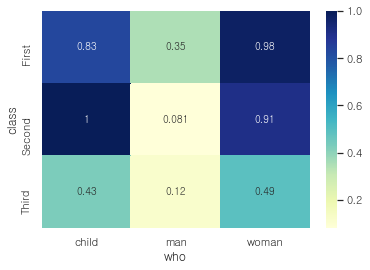

In [20]:
# 피봇테이블은 (행,열)의 데이터의 평균 값을 나타낸 테이블이다. 

pivot = df.pivot_table(index = 'class', columns = 'who', values = 'survived')    # 피봇테이블 만들기. index와 컬럼은 범주형이여야 한다!!
#pivot = df.pivot_table('survived', index = 'class', columns = 'who')   위와 같은 그래프이다 (values를 생략하고 survived를 앞으로 땡김)
print(pivot)                                             
sns.heatmap(data=pivot, annot=True, cmap='YlGnBu')     # annot=True로 데이터의 수치값이 셀에 나타남, cmap:컬러 맵

plt.show()

# pairplot

     survived     fare   age  pclass
0           0   7.2500  22.0       3
1           1  71.2833  38.0       1
2           1   7.9250  26.0       3
3           1  53.1000  35.0       1
4           0   8.0500  35.0       3
..        ...      ...   ...     ...
886         0  13.0000  27.0       2
887         1  30.0000  19.0       1
888         0  23.4500   NaN       3
889         1  30.0000  26.0       1
890         0   7.7500  32.0       3

[891 rows x 4 columns]


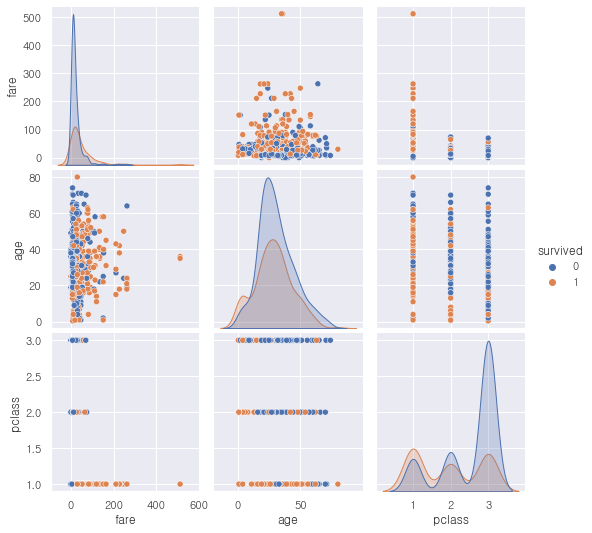

In [21]:
newdf = df.loc[:, ['survived', 'fare', 'age', 'pclass']]
print(newdf)
sns.pairplot(data=newdf, hue='survived')

plt.show()

## Lmplot(): 선형 회귀 모델 그래프 : 수치형 데이터 사용

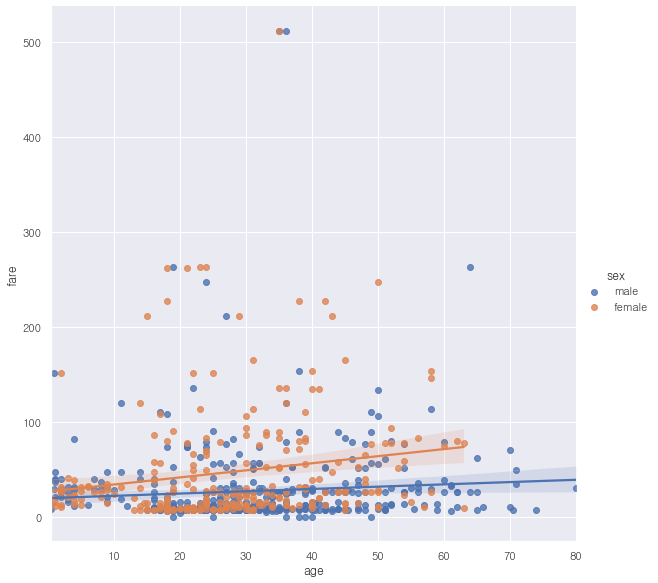

In [26]:
sns.lmplot(x='age', y='fare', hue='sex', height=8, data=df)
#sns.lmplot(x='age', y='fare', hue='sex', col='survived', height=8, data=df)   # col을 사용하면 항목별 그래프를  그릴수 있다 (범주형 데이터 필요)

plt.show()

## relplot(): Lmplot과 두 column간 상관관계를 보여주는것은 비슷하지만, 
## 선형회귀 직선은 그리지 않음.

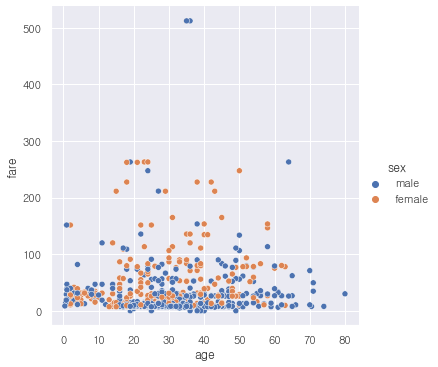

In [28]:
sns.relplot(x='age', y='fare', hue='sex', col='survived', row='who', data = df)      # col과 row를 생략하면 산점도그래프가 그려진다

## jointplot(): 중앙에는 scatter플롯, 차트의 가장자리에는 히스토그램을 동시에 그려주는 함수
### jointplot은 숫자형 데이터만 표현 가능!!!

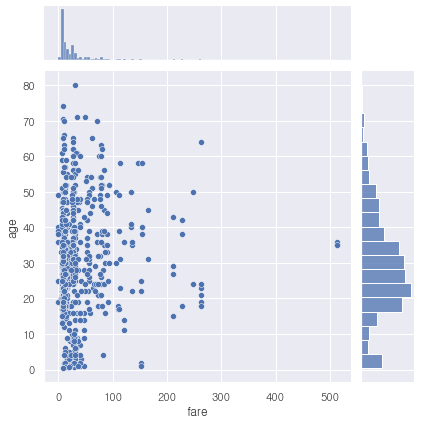

In [34]:
sns.jointplot(x='fare', y='age', data=df)    # fare: 티켓 요금
#sns.jointplot(x='fare', y='age', kind='reg', data=df)    # kind 옵션을 추가할수 있음 (reg는 선형회귀 선)

## barplot() 

<AxesSubplot:xlabel='who', ylabel='age'>

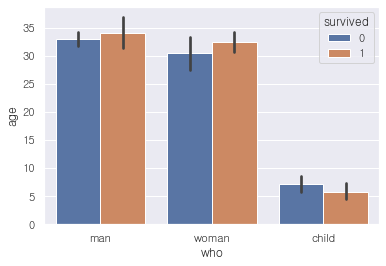

In [37]:
 sns.barplot(x='who', y='age', hue='survived', data=df)   # errwidth=0 옵션을 추가하면 에러바가 사라진다! errwidth는 에러바의 두께
 #sns.barplot(x='who', y='survived', hue='sex', errwidth=0, data=df)    # 남성,여성,아이 별로 생존률 나타내기!

<AxesSubplot:xlabel='class', ylabel='survived'>

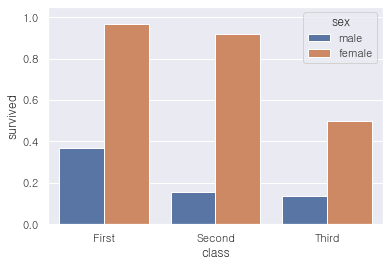

In [39]:
sns.barplot(x='class', y='survived', hue='sex', errwidth=0, data=df)    # 성별을 범주로하여 클래스별로 생존률 나타내기

## boxplot

<AxesSubplot:xlabel='sex', ylabel='age'>

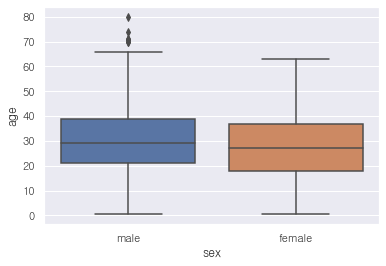

In [40]:
sns.boxplot(x='sex', y='age', data=df)

# Iris 데이터셋

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)   # 모든 행 출력(그래야 setosa, versicolor, virginica 이 3개의 고유값이 모두 보인다)

print('>> Seaborn 라이브러리에서 iris 데이터셋 가져오기')
df = sns.load_dataset('iris')
print('< 데이터 개수: ', df.shape)

print(df['species'])    # species 열의 데이터 전체 출력

setosa = df.query("species == 'setosa'")   # df.query: 조건에 부합하는 데이터만 선택 (종이 세토사인 행을 모두 추출)
virginica = df.query("species == 'virginica'")

print('>> 수치 데이터에 대한 요약정보 출력\n')
setosa.describe()

>> Seaborn 라이브러리에서 iris 데이터셋 가져오기
< 데이터 개수:  (150, 5)
0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
5          setosa
6          setosa
7          setosa
8          setosa
9          setosa
10         setosa
11         setosa
12         setosa
13         setosa
14         setosa
15         setosa
16         setosa
17         setosa
18         setosa
19         setosa
20         setosa
21         setosa
22         setosa
23         setosa
24         setosa
25         setosa
26         setosa
27         setosa
28         setosa
29         setosa
30         setosa
31         setosa
32         setosa
33         setosa
34         setosa
35         setosa
36         setosa
37         setosa
38         setosa
39         setosa
40         setosa
41         setosa
42         setosa
43         setosa
44         setosa
45         setosa
46         setosa
47         setosa
48         setosa
49         setosa
50     versicolor
51     versicolor
52     ver

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


## distplot()

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

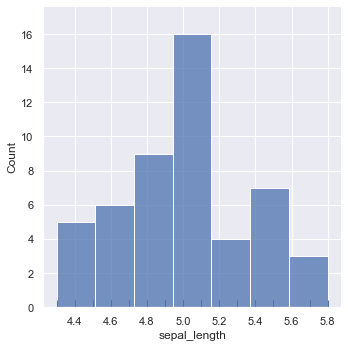

In [62]:
#ex) 13-14
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='darkgrid')

df = sns.load_dataset('iris')

setosa = df.query("species == 'setosa'")
virginica = df.query("species == 'virginica'")

print(setosa)   

sns.displot(setosa['sepal_length'], rug=True )    # 히스토그램과 커널 밀도 그래프 겹쳐서 그리기  (종이 setosa이고, sepal_length 의 데이터만 사용)
                                                    # rug: 데이터의 위치들을 표시
plt.show()

# 14주차 시작

C:\Users\create\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\create\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


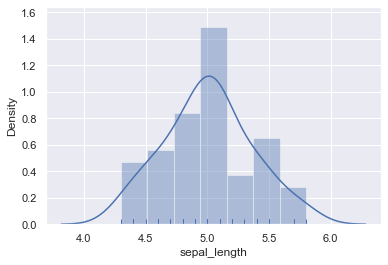

In [66]:
#Ex)13-14
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='darkgrid')

df = sns.load_dataset('iris')

setosa = df.query("species == 'setosa'")
virginica = df.query("species == 'virginica'")

sns.distplot(setosa['sepal_length'], rug = True, hist = True, kde = True)    # (중요) hist=True, kde=True 는 기본값이라 생략 가능

plt.show()

## 복수 개의 커널 밀도 시각화

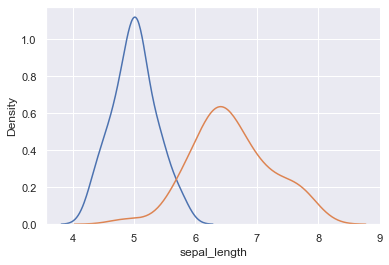

In [85]:
#Ex)13-15
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

sns.set(style='darkgrid')

df = sns.load_dataset('iris')

# 꽃의 품종별 부분 데이터셋 설정 (세토사, 버지니카)
setosa = df.query("species == 'setosa'")
virginica = df.query("species == 'virginica'")    

# 커널 밀도 그래프 그리기
sns.kdeplot(setosa['sepal_length'])
sns.kdeplot(virginica['sepal_length'])

plt.show() 

data, data2를 이용해 2개의 곡선을 하나로 그리기

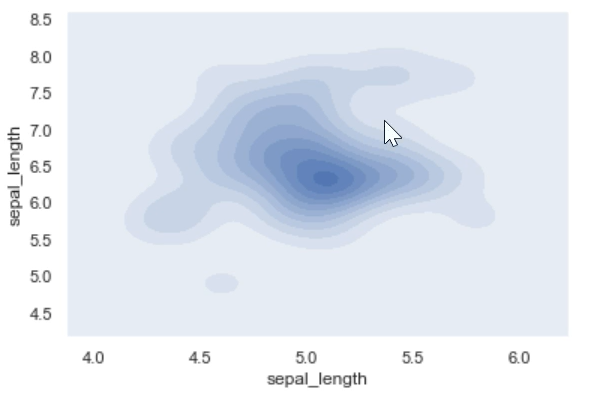

C:\Users\create\Anaconda3\lib\site-packages\seaborn\distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)
C:\Users\create\Anaconda3\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


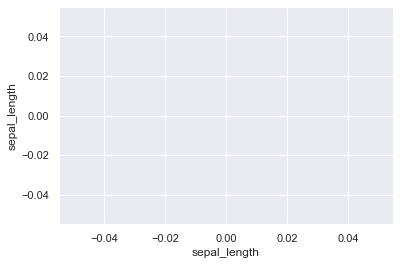

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

sns.set(style='darkgrid')

df = sns.load_dataset('iris')

# 꽃의 품종별 부분 데이터셋 설정 (세토사, 버지니카)
setosa = df.query("species == 'setosa'")
virginica = df.query("species == 'virginica'")     

# 커널 밀도 그래프 그리기
sns.kdeplot(data=setosa['sepal_length'], data2=virginica['sepal_length'], shade=True)

plt.show()

## countplot

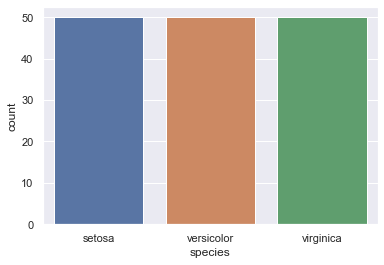

In [105]:
df = sns.load_dataset('iris')

setosa = df.query("species == 'setosa'")
versicolor = df.query("species == 'versicolor'")
virginica = df.query("species == 'virginica'")

sns.countplot(x='species', data=df)   # countplot의 x축은 범주형 컬럼만 사용 가능(iris데이터에서 범주형 컬럼은 species 단 하나.)

plt.show()

## violinplot

<AxesSubplot:xlabel='sepal_length'>

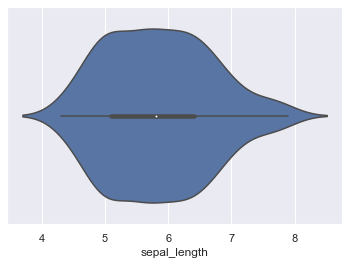

In [116]:
sns.violinplot(x='sepal_length', data=df)    # 전체적인 'sepal_length' 의 분포도

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

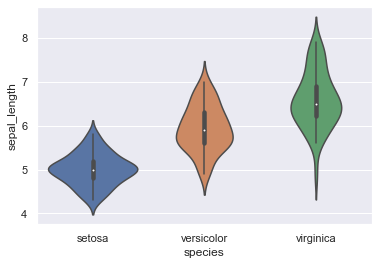

In [117]:
sns.violinplot(x='species', y='sepal_length', data=df)   # (이게 더 중요!) 각각의 종에 해당되는 'sepal_length' 의 분포도

## stripplot

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

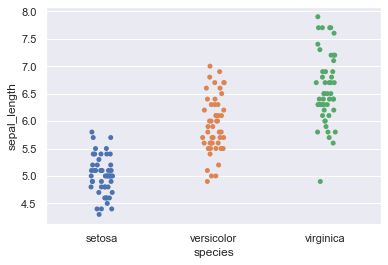

In [118]:
sns.stripplot(x='species', y='sepal_length', data=df, jitter=True, size=5)  # jitter=True는 점들이 겹치지 않도록 함, size는 점의 크기

## swarmplot

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

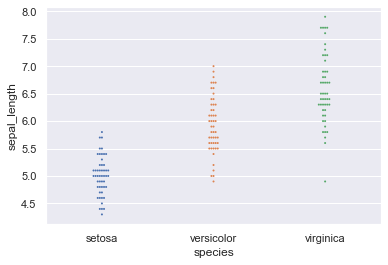

In [121]:
sns.swarmplot(x='species', y='sepal_length', data=df, size=2)   # 옵션은 stripplot과 비슷한데 jitter옵션만 빠진다! (기본으로 겹쳐지지 않기 때문)